In [1]:
import io
import requests
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 台股大盤指數資料datafr(2015/04/30-2019/04/29)

In [2]:
tw = pd.read_csv('TSEC_weighted_index.csv')

In [3]:
tw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-04-30,9841.150391,9894.900391,9820.049805,9820.049805,9820.012695,2644700.0
1,2015-05-04,9853.509766,9871.650391,9800.480469,9845.040039,9845.002930,2298800.0
2,2015-05-05,9849.129883,9855.639648,9788.129883,9820.129883,9820.092773,2134800.0
3,2015-05-06,9780.389648,9829.429688,9735.940430,9818.200195,9818.163086,2353700.0
4,2015-05-07,9789.820313,9789.820313,9704.110352,9704.110352,9704.073242,2315900.0


In [4]:
tw.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
977,2019-04-23,10994.280273,11025.679688,10949.299805,11025.679688,11025.679688,1.937303e+09
978,2019-04-24,11054.019531,11070.849609,10995.830078,11027.639648,11027.639648,2.093864e+09
979,2019-04-25,11017.730469,11046.769531,11006.679688,11039.860352,11039.860352,2.137391e+09
980,2019-04-26,10986.530273,10986.530273,10906.440430,10952.469727,10952.469727,2.109398e+09
981,2019-04-29,10952.910156,10992.549805,10905.780273,10939.059570,10939.059570,2.060935e+09


### VIX指數資料dataframe(2015/04/30-2019/04/30)

In [5]:
vix = pd.read_csv('^VIX.csv')
vix = vix.drop([0])

In [6]:
vix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1,2015-04-30,13.89,15.290000,12.49,14.55,14.55,0
2,2015-05-01,13.98,13.980000,12.68,12.70,12.70,0
3,2015-05-04,13.12,13.180000,12.10,12.85,12.85,0
4,2015-05-05,13.21,14.410000,12.97,14.31,14.31,0
5,2015-05-06,13.93,16.360001,13.89,15.15,15.15,0


In [7]:
vix.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1002,2019-04-23,12.66,12.69,12.08,12.28,12.28,0
1003,2019-04-24,12.53,13.23,12.26,13.14,13.14,0
1004,2019-04-25,13.29,14.30,12.81,13.25,13.25,0
1005,2019-04-26,13.44,13.62,12.49,12.73,12.73,0
1006,2019-04-29,13.04,13.27,12.65,13.11,13.11,0


### 合併dataframe，這樣就可以去除vix比tw多的資料（台股營業日跟vix不一樣）

In [8]:
newdf = pd.concat([tw,vix], join='outer', axis=1)

In [9]:
new_tw = newdf.iloc[:,[0,1,2,3,4,5,6]]
new_vix = newdf.iloc[:,[7,8,9,10,11,12,13]]

In [10]:
new_tw.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
new_vix.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1002,2019-04-23,12.66,12.69,12.08,12.28,12.28,0.0
1003,2019-04-24,12.53,13.23,12.26,13.14,13.14,0.0
1004,2019-04-25,13.29,14.30,12.81,13.25,13.25,0.0
1005,2019-04-26,13.44,13.62,12.49,12.73,12.73,0.0
1006,2019-04-29,13.04,13.27,12.65,13.11,13.11,0.0


### 拿vix的open,high,low, adj close作為 x(s)，tw的adj close作為y

In [13]:
X = new_vix.iloc[:, 5]
y = new_tw.iloc[:, 5]

In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train = X_train.dropna()
X_train = X_train.drop(X_train.index[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]])
y_train = y_train.dropna()

X_test = X_test.drop(X_test.index[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]])
y_test = y_test.dropna()
y_test = y_test.drop(y_test.index[[1,2,3,4,5,6,7]])

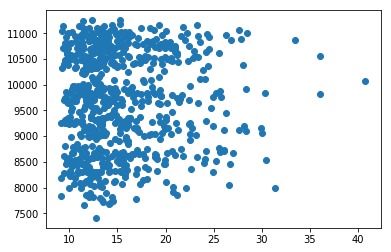

In [38]:
plt.scatter(X_train, y_train)

In [29]:
from sklearn.linear_model import LinearRegression

In [33]:
new_X_train = np.array(X_train).reshape(-1,1)
new_y_train = np.array(y_train).reshape(-1,1)
reg = LinearRegression().fit(new_X_train, new_y_train)

In [36]:
reg.score(new_X_train, new_y_train)

0.0007035735995379877